In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_path = "/content/drive/My Drive/Xray_Dataset"
if os.path.exists(dataset_path):
    print("Dataset folder found!")
    print("Files inside:", os.listdir(dataset_path))
else:
    print("Dataset folder not found. Check the path!")


Dataset folder found!
Files inside: ['TB_Chest_Radiography_Database']


In [ ]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the dataset directory
dataset_dir = "/content/drive/MyDrive/Xray_Dataset/TB_Chest_Radiography_Database"  # Path updated
normal_dir = os.path.join(dataset_dir, "Normal")
tuberculosis_dir = os.path.join(dataset_dir, "Tuberculosis")

def preprocess_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith((".png", ".jpg")):  # Check for .png and .jpg files
            image_path = os.path.join(image_dir, filename)
            image = Image.open(image_path)
            image = image.convert("RGB")      # Convert grayscale to RGB
            image = image.resize((224, 224))  # Resize images to 224x224 pixels
            image = np.array(image) / 255.0   # Normalize pixel values to [0, 1]
            images.append(image)
            labels.append(label)
    return images, labels

# Load and preprocess normal images
normal_images, normal_labels = preprocess_images(normal_dir, label=0)

# Load and preprocess tuberculosis images
tuberculosis_images, tuberculosis_labels = preprocess_images(tuberculosis_dir, label=1)

# Combine normal and tuberculosis images
images = normal_images + tuberculosis_images
labels = normal_labels + tuberculosis_labels

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Hyperparameters
batch_size = 64
input_shape = (224, 224, 3)
num_epochs = 20
initial_learning_rate = 0.001

# Learning rate schedule
def lr_schedule(epoch):
    decay_rate = 0.1
    decay_steps = 10
    return initial_learning_rate * decay_rate ** (epoch / decay_steps)

# Model architecture with L2 regularization
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),

        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create the model
model = create_model(input_shape)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Train the model
history = model.fit(
    train_images,
    train_labels,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(test_images, test_labels)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Classification report
print("\nClassification Report:")
print(classification_report(test_labels, predictions))

# Confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("\nConfusion Matrix:")
print(cm)

# Save the trained model
model.save('Model1.h5')
print("Model saved successfully.")



9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 975ms/step - accuracy: 0.9523 - loss: 0.2368
Test Accuracy: 96.43%
Test Loss: 0.2238
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step

Classification Report:


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       140
           1       0.95      0.99      0.97       140

    accuracy                           0.96       280
   macro avg       0.97      0.96      0.96       280
weighted avg       0.97      0.96      0.96       280


Confusion Matrix:
[[132   8]
 [  2 138]]
Model saved successfully.


Mounted at /content/drive


Model loaded successfully!


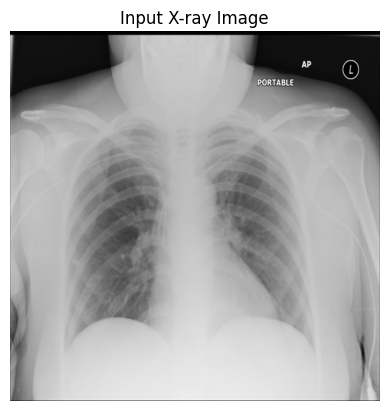

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Prediction: No Tuberculosis
Confidence: 100.00%


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Load the trained model
model_path = "/content/drive/My Drive/Model1.h5"
model = tf.keras.models.load_model(model_path)

print("Model loaded successfully!")

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path)  # Load image in RGB mode
    image = cv2.resize(image, (224, 224))  # Resize to model's expected input size
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize pixel values
    return image

# Path to the image
image_path = "/content/Normal-2072.png"

# Load and preprocess image
processed_image = preprocess_image(image_path)

# Display the image
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.title("Input X-ray Image")
plt.show()

# Make a prediction
prediction = model.predict(processed_image)[0][0]  # Get prediction score

# Convert prediction to label
label = "Tuberculosis" if prediction > 0.5 else "No Tuberculosis"
confidence = prediction if prediction > 0.5 else 1 - prediction

# Print results
print(f"Prediction: {label}")
print(f"Confidence: {confidence * 100:.2f}%")


In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file uploader


Saving Normal-2072.png to Normal-2072.png
